In [1]:
import pandas as pd
import numpy as np

In [2]:
# df viene de dataframe xd
df = pd.read_csv("kc_house_data.csv")
# se eliminan las columnas con información irrelevante para el analisis
df.drop(['id','date','zipcode'],axis=1,inplace=True)
# se muestran por defecto las primeras 5 filas del dataset
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [3]:
# El dataset posee 21613 casos de estudio (casas a la venta)
# Además de 18 atributos relevantes para cada uno de estos casos
df.shape

(21613, 18)

In [4]:
# En su mayoría los atributos se representan con un numero entero
# Se utiliza float64 cuando se necesita representar una fracción
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


In [5]:
# En promedio las casas se venden por 540000USD
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
# Se llevan los datos de cada atributo a una normal estandar
# z=(x-\mu)/\sigma
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Para la variable a predecir se realiza linealizacion (log)
# Esto es para que la regresion lineal tenga sentido
df_scaled['price'] = np.log(df['price'])
# df_scaled.head()

In [8]:
import sklearn.linear_model as lm
# Se consideran todos los casos y todos los atributos menos el precio
X = df_scaled.iloc[:, 1:]
#Numero de casos (N=21613)
N = X.shape[0]
p = X.shape[1]
# Se inserta una columna llena de 1s al final del data set
# Corresponde al elemento que se multiplicara con el intercepto
# del atributo en la regresión lineal
X.insert(X.shape[1], 'intercept', np.ones(N))
# En y se guarda la columna con los precios, es decir los valores de la regresion
y = df_scaled['price']
# mascara estatica con el 70% de los datos
# se crea un vector lleno de 0s del largo de x
# podria reemplazarse con mascara=np.zeros(N)
mascara = np.zeros(len(X))
# 70% de los datos. De nuevo, creo que se puede reemplazar con N xd
# limit = int(N*0.7)
limit = int(len(X)*0.7)
# llena los primeros N*0.7 elementos de mascara con 1s
mascara[:limit] = 1
# istrain se define como un vector con las mismas dimensiones de mascara
# y que indica si el elemento es o no parte del 70% de entrenamiento
istrain = mascara == 1
# Con la ayuda de istrain se extraen los atributos y precio del 70% de 
# los casos, los cuales seran utilizados como entrenamiento
Xtrain = X[istrain]
ytrain = y[istrain]
# El resto de los datos se utilizan como test (30%)
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
# Se define una regresion donde no se calcula el intercepto
# Se deja de esta forma ya que los datos ya se encuentran normalizados
# (centrados en 0)
linreg = lm.LinearRegression(fit_intercept = False)
# Finalmente se define la regresion lineal con los datos de entrenamiento
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [9]:
weights = linreg.coef_
atribute_names = list(X.columns.values)

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()


yhat = linreg.predict(Xtrain)
yerror = ytrain - yhat
yerror2 = yerror**2
Syerror2 = np.sum(yerror2)
sigma = np.sqrt(Syerror2/(int(0.7*N)))
covm = np.dot(Xm.T,Xm)
v = np.linalg.inv(covm)
print("Dimensiones matriz covarianza",covm.shape[0],covm.shape[1])
print("Determinante matriz covarianza:", np.linalg.det(covm))
eig_val, eig_vec = np.linalg.eig(covm)
print("valores propios covarianza:", eig_val)
covm_inf_norm = np.linalg.norm(covm,np.inf)
v_inf_norm = np.linalg.norm(v,np.inf)
print("Norma inf Covarianza:",covm_inf_norm,
      "\nNorma inf Covarianza inversa:",v_inf_norm,
      "\nNumero de condicion:",covm_inf_norm*v_inf_norm)
#print("vectores propios:", eig_vec)
vj = v.diagonal()
print("Diagonal de Inversa:", vj)
#print("(cov*cov-1) - I_n =", np.dot(v,covm))
zscores = np.zeros(p+1)
for i in range(p+1):
    zscores[i] = weights[i]/(sigma*np.sqrt(vj[i]))
    
d = {'Pesos' : pd.Series(weights, index =atribute_names),
    'Z-Score': pd.Series(zscores, index =atribute_names)}

table1 = pd.DataFrame(d)

table1.head(18)

Dimensiones matriz covarianza 18 18
Determinante matriz covarianza: -1.20829463848e+57
valores propios covarianza: [  7.60216839e+04   3.12492543e+04   2.73713285e+04   1.97938266e+04
   1.72108891e+04   1.51500524e+04   1.49113282e+04   1.33015124e+04
   1.11256313e+04   9.85673850e+03   8.04829291e+03   7.65992255e+03
   5.00239793e+03   4.40471585e+03   2.85802165e+03   3.29851598e+03
   3.60591045e+03  -3.26010191e-12]
Norma inf Covarianza: 104968.068976 
Norma inf Covarianza inversa: 325116899081.0 
Numero de condicion: 3.41268930881e+16
Diagonal de Inversa: [  1.15008239e-04   2.25685494e-04  -1.36402957e+11   1.31693286e-04
   1.45329726e-04   7.95928908e-05   9.06468643e-05   7.52435192e-05
   2.32319926e-04  -1.10886190e+11  -3.16734373e+10   1.63679249e-04
   7.14145385e-05   7.29759531e-05   1.01906417e-04   2.05793568e-04
   1.38230362e-04   6.80268750e-05]


C:\Users\Javier\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


,Pesos,Z-Score
bedrooms,-0.008270,-3.035987
bathrooms,0.055960,14.665238
sqft_living,0.057769,NaN
sqft_lot,0.022159,7.602265
floors,0.037595,12.277599
waterfront,0.033526,14.794985
view,0.042082,17.401632
condition,0.045277,20.549723
grade,0.186212,48.098398
sqft_above,0.047130,NaN


*Inserte explicación de porqué dropear la columna sqft_living*

Se calcula todo de nuevo, pero sin la columna

In [10]:
import sklearn.linear_model as lm
df_scaled.drop(['sqft_living'],axis=1,inplace=True)
# Se consideran todos los casos y todos los atributos menos el precio
X = df_scaled.iloc[:, 1:]
#Numero de casos (N=21613)
N = X.shape[0]
p = X.shape[1]
# Se inserta una columna llena de 1s al final del data set
# Corresponde al elemento que se multiplicara con el intercepto
# del atributo en la regresión lineal
X.insert(X.shape[1], 'intercept', np.ones(N))
# En y se guarda la columna con los precios, es decir los valores de la regresion
y = df_scaled['price']
# mascara estatica con el 70% de los datos
# se crea un vector lleno de 0s del largo de x
# podria reemplazarse con mascara=np.zeros(N)
mascara = np.zeros(len(X))
# 70% de los datos. De nuevo, creo que se puede reemplazar con N xd
# limit = int(N*0.7)
limit = int(len(X)*0.7)
# llena los primeros N*0.7 elementos de mascara con 1s
mascara[:limit] = 1
# istrain se define como un vector con las mismas dimensiones de mascara
# y que indica si el elemento es o no parte del 70% de entrenamiento
istrain = mascara == 1
# Con la ayuda de istrain se extraen los atributos y precio del 70% de 
# los casos, los cuales seran utilizados como entrenamiento
Xtrain = X[istrain]
ytrain = y[istrain]
# El resto de los datos se utilizan como test (30%)
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
# Se define una regresion donde no se calcula el intercepto
# Se deja de esta forma ya que los datos ya se encuentran normalizados
# (centrados en 0)
linreg = lm.LinearRegression(fit_intercept = False)
# Finalmente se define la regresion lineal con los datos de entrenamiento
linreg.fit(Xtrain, ytrain)

weights = linreg.coef_
atribute_names = list(X.columns.values)

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

yhat = linreg.predict(Xtrain)
yerror = ytrain - yhat
yerror2 = yerror**2
Syerror2 = np.sum(yerror2)
sigma = np.sqrt(Syerror2/(int(0.7*N)))

covm = np.dot(Xm.T,Xm)
v = np.linalg.inv(covm)
covm_inf_norm = np.linalg.norm(covm,np.inf)
v_inf_norm = np.linalg.norm(v,np.inf)
print("Norma inf Covarianza:",covm_inf_norm,
      "\nNorma inf Covarianza inversa:",v_inf_norm,
      "\nNumero de condicion:",covm_inf_norm*v_inf_norm)
vj = v.diagonal()
print("Diagonal de Inversa:", vj)
#print("(cov*cov-1) - I_n =", np.dot(v,covm))
zscores = np.zeros(p+1)
for i in range(p):
    zscores[i] = weights[i]/(sigma*np.sqrt(vj[i]))
    
d = {'Pesos' : pd.Series(weights, index =atribute_names),
    'Z-Score': pd.Series(zscores, index =atribute_names)}

table1 = pd.DataFrame(d)

table1.head(18)

Norma inf Covarianza: 86377.3598713 
Norma inf Covarianza inversa: 0.000927188609697 
Numero de condicion: 80.0881042084
Diagonal de Inversa: [  1.15008239e-04   2.25685494e-04   1.31693286e-04   1.45329726e-04
   7.95928908e-05   9.06468643e-05   7.52435192e-05   2.32319926e-04
   3.42759861e-04   1.28472055e-04   1.63679249e-04   7.14145385e-05
   7.29759531e-05   1.01906417e-04   2.05793568e-04   1.38230362e-04
   6.80268750e-05]


,Pesos,Z-Score
bedrooms,-0.008270,-3.035987
bathrooms,0.055960,14.665238
sqft_lot,0.022159,7.602265
floors,0.037595,12.277599
waterfront,0.033526,14.794985
view,0.042082,17.401632
condition,0.045277,20.549723
grade,0.186212,48.098398
sqft_above,0.099216,21.098521
sqft_basement,0.059536,20.679680


Los atributos más correlacionados con el resultado corresponden a:
<ul>
<li>sqft_living -> -2.630538e+07</li>
<li>sqft_above -> 2.630538e+07</li>
<li>sqft_basement -> 2.630538e+07</li>
</ul>

Con un nivel de significancia del 5% se observa que solo un atributo (long) está fuera del rango.


0.0646829054256
0.06525925123726144


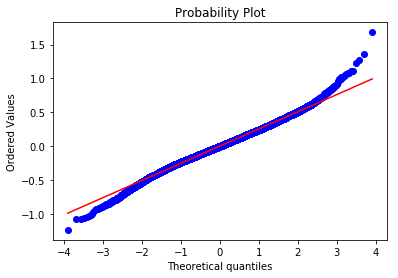

In [11]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
mse_cv = 0
mse_list=[]
error_val_list = []
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    error_val = yhat_val - ym[val]
    error_val_list = np.concatenate((error_val_list,error_val),axis=0)
    mse_fold = np.mean(np.power(error_val, 2))
    mse_cv += mse_fold
    mse_list.append(mse_cv)
mse_cv = mse_cv / k
print (mse_cv)
print (mse_test)

import numpy as np 
import pylab 
import scipy.stats as stats
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(error_val_list, dist="norm", plot=pylab)
pylab.show()

Error de predicción para K=10: 0.0646905656615
Error de predicción para K=5: 0.0646902919559
Error sobre el conjunto de pruebas: 0.06528783139699916 (despues cambio a 0.06541240758606384)

Si es razonable asumir que los residuos se ajusten a una normal.

In [12]:
def fss(x, y, names_x, k = 10):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
names_regressors = X.columns[:-1] #without intercept
fss(Xm,ym,names_regressors)

selected = grade ...
totalvars=2, mse = 0.143260
selected = lat ...
totalvars=3, mse = 0.103340
selected = yr_built ...
totalvars=4, mse = 0.093145
selected = bathrooms ...
totalvars=5, mse = 0.081737
selected = sqft_living15 ...
totalvars=6, mse = 0.074692
selected = view ...
totalvars=7, mse = 0.071336
selected = condition ...
totalvars=8, mse = 0.069809
selected = sqft_above ...
totalvars=9, mse = 0.068097
selected = sqft_basement ...
totalvars=10, mse = 0.066743
selected = waterfront ...
totalvars=11, mse = 0.065743


[16, 7, 12, 10, 1, 14, 5, 6, 8, 9, 4]

3 A

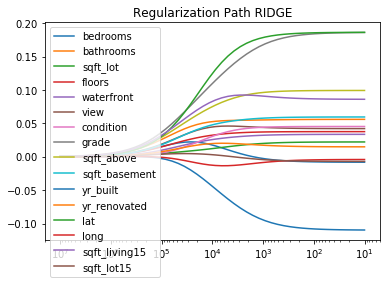

In [13]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

3 B

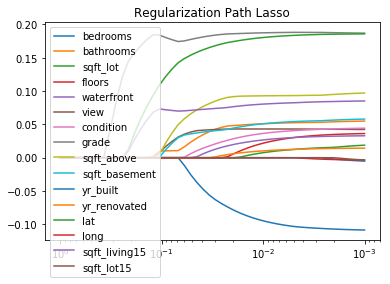

In [14]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path Lasso')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

3 C

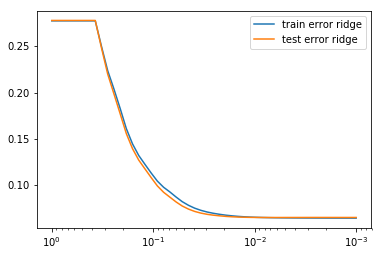

In [15]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

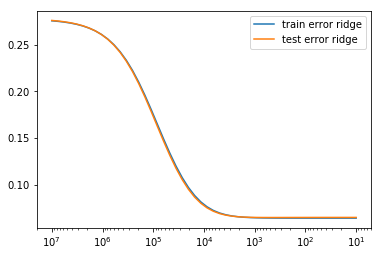

In [16]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

(e) Estime el valor del par´ametro de regularizaci´on en alguno de los modelos anteriores haciendo uso de
la t´ecnica validaci´on cruzada.

In [17]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
alphas_ = np.logspace(7,1,base=10)
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print ("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

BEST PARAMETER=10000000.000000, MSE(CV)=0.275842
BEST PARAMETER=7543120.063355, MSE(CV)=0.275307
BEST PARAMETER=5689866.029018, MSE(CV)=0.274602
BEST PARAMETER=4291934.260129, MSE(CV)=0.273675
BEST PARAMETER=3237457.542818, MSE(CV)=0.272457
BEST PARAMETER=2442053.094549, MSE(CV)=0.270863
BEST PARAMETER=1842069.969327, MSE(CV)=0.268784
BEST PARAMETER=1389495.494373, MSE(CV)=0.266087
BEST PARAMETER=1048113.134155, MSE(CV)=0.262614
BEST PARAMETER=790604.321091, MSE(CV)=0.258177
BEST PARAMETER=596362.331659, MSE(CV)=0.252573
BEST PARAMETER=449843.266897, MSE(CV)=0.245595
BEST PARAMETER=339322.177190, MSE(CV)=0.237056
BEST PARAMETER=255954.792270, MSE(CV)=0.226829
BEST PARAMETER=193069.772888, MSE(CV)=0.214891
BEST PARAMETER=145634.847750, MSE(CV)=0.201371
BEST PARAMETER=109854.114199, MSE(CV)=0.186570
BEST PARAMETER=82864.277285, MSE(CV)=0.170961
BEST PARAMETER=62505.519253, MSE(CV)=0.155134
BEST PARAMETER=47148.663635, MSE(CV)=0.139721
BEST PARAMETER=35564.803062, MSE(CV)=0.125302
BEST PA

In [18]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
alphas_ = np.logspace(0,-3,base=10)
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print ("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

BEST PARAMETER=1.000000, MSE(CV)=0.277498
BEST PARAMETER=0.323746, MSE(CV)=0.250036
BEST PARAMETER=0.281177, MSE(CV)=0.223811
BEST PARAMETER=0.244205, MSE(CV)=0.204031
BEST PARAMETER=0.212095, MSE(CV)=0.183156
BEST PARAMETER=0.184207, MSE(CV)=0.161219
BEST PARAMETER=0.159986, MSE(CV)=0.144672
BEST PARAMETER=0.138950, MSE(CV)=0.132192
BEST PARAMETER=0.120679, MSE(CV)=0.122639
BEST PARAMETER=0.104811, MSE(CV)=0.113407
BEST PARAMETER=0.091030, MSE(CV)=0.104625
BEST PARAMETER=0.079060, MSE(CV)=0.097985
BEST PARAMETER=0.068665, MSE(CV)=0.092977
BEST PARAMETER=0.059636, MSE(CV)=0.087512
BEST PARAMETER=0.051795, MSE(CV)=0.082435
BEST PARAMETER=0.044984, MSE(CV)=0.078544
BEST PARAMETER=0.039069, MSE(CV)=0.075445
BEST PARAMETER=0.033932, MSE(CV)=0.073085
BEST PARAMETER=0.029471, MSE(CV)=0.071284
BEST PARAMETER=0.025595, MSE(CV)=0.069894
BEST PARAMETER=0.022230, MSE(CV)=0.068798
BEST PARAMETER=0.019307, MSE(CV)=0.067870
BEST PARAMETER=0.016768, MSE(CV)=0.067149
BEST PARAMETER=0.014563, MSE(CV)=0

4

In [19]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

4 A

In [20]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)